In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#data=pd.read_csv("C:\\Users\\Utsav\\Desktop\\Mxene\\ML_exp", sep=',',header=0)

url = "https://raw.githubusercontent.com/UtsavMurarka/MXene-machine-learning/master/data_new.csv"

data=pd.read_csv(url, sep=',',header=0)
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,band gap,label
0,3.261006,0.0,0.0,-1.630503,2.824114,0.0,0.000000e+00,1.000000e-16,32.77823,0.333333,0.666667,0.382597,0.666667,0.333333,0.219565,0.000000,0.000000,0.301081,0.333333,0.666667,0.274615,0.666667,0.333333,0.327546,24.0,24.0,6.0,35.0,35.0,0.0,0
1,3.128723,0.0,0.0,-1.564361,2.709553,0.0,0.000000e+00,-2.000000e-16,35.60857,0.333333,0.666667,0.374045,0.000000,0.000000,0.296135,0.333333,0.666667,0.269526,0.666667,0.333333,0.322062,0.666667,0.333333,0.243635,24.0,24.0,6.0,35.0,1.0,0.0,0
2,3.242942,0.0,0.0,-1.621471,2.808470,0.0,1.000000e-16,-2.000000e-16,33.14441,0.666667,0.333333,0.219954,0.000000,0.000000,0.301989,0.333333,0.666667,0.379072,0.333333,0.666667,0.273958,0.666667,0.333333,0.330431,24.0,24.0,6.0,17.0,35.0,0.0,0
3,3.175536,0.0,0.0,-1.587768,2.750095,0.0,0.000000e+00,-1.000000e-16,34.56644,0.000000,0.000000,0.301081,0.333333,0.666667,0.375717,0.666667,0.333333,0.226444,0.333333,0.666667,0.274360,0.666667,0.333333,0.327801,24.0,24.0,6.0,17.0,17.0,0.0,0
4,3.095383,0.0,0.0,-1.547692,2.680681,0.0,0.000000e+00,2.000000e-16,36.37976,0.000000,0.000000,0.297156,0.333333,0.666667,0.369466,0.333333,0.666667,0.270359,0.666667,0.333333,0.323307,0.666667,0.333333,0.245114,24.0,24.0,6.0,17.0,1.0,0.0,0


In [10]:
mxene=data.values
mxene=np.array(mxene)
#split the data
train, test = train_test_split(data, test_size=0.2)
train=np.array(train)
test=np.array(test)
NegativeCount=0
PositiveCount=0
for i in range(len(train)):
    if train[i][30]==0 :
        NegativeCount=NegativeCount+1
    if train[i][30]==1:
        PositiveCount=PositiveCount+1
print(NegativeCount)
print(PositiveCount)
print(PositiveCount+NegativeCount)
positives=np.zeros((PositiveCount,31))
negatives=np.zeros((NegativeCount,31))
    
j=0
k=0
    
for i in range(len(train)):

    if(train[i,30] == 1):
        positives[j,:] = train[i,:]
        j=j+1
    if(train[i,30] == 0):
        negatives[k,:] = train[i,:]
        k=k+1

print(np.shape(train))
print(np.shape(test))
y_train=np.zeros(len(train))
y_test=np.zeros(len(test))
for i in range(len(test)):
    y_test[i]=test[i][30]
    test[i][30]=1

for i in range(len(train)):
    y_train[i]=train[i][30]
    train[i][30]=1

train = np.delete(train, 30, 1)
test = np.delete(test, 30, 1)

train = np.delete(train, 29, 1)
test = np.delete(test, 29, 1)

print(np.shape(train))
print(np.shape(test))
print(positives)

2152
311
2463
(2463, 31)
(616, 31)
(2463, 29)
(616, 29)
[[3.273437e+00 0.000000e+00 0.000000e+00 ... 1.000000e+00 2.470000e-01
  1.000000e+00]
 [3.395889e+00 1.000000e-16 0.000000e+00 ... 3.500000e+01 2.900000e-02
  1.000000e+00]
 [3.284569e+00 0.000000e+00 0.000000e+00 ... 9.000000e+00 7.460000e-01
  1.000000e+00]
 ...
 [3.406593e+00 0.000000e+00 0.000000e+00 ... 3.500000e+01 1.000000e-01
  1.000000e+00]
 [3.145907e+00 0.000000e+00 0.000000e+00 ... 1.000000e+00 4.970000e-01
  1.000000e+00]
 [3.376448e+00 0.000000e+00 0.000000e+00 ... 1.700000e+01 5.200000e-01
  1.000000e+00]]


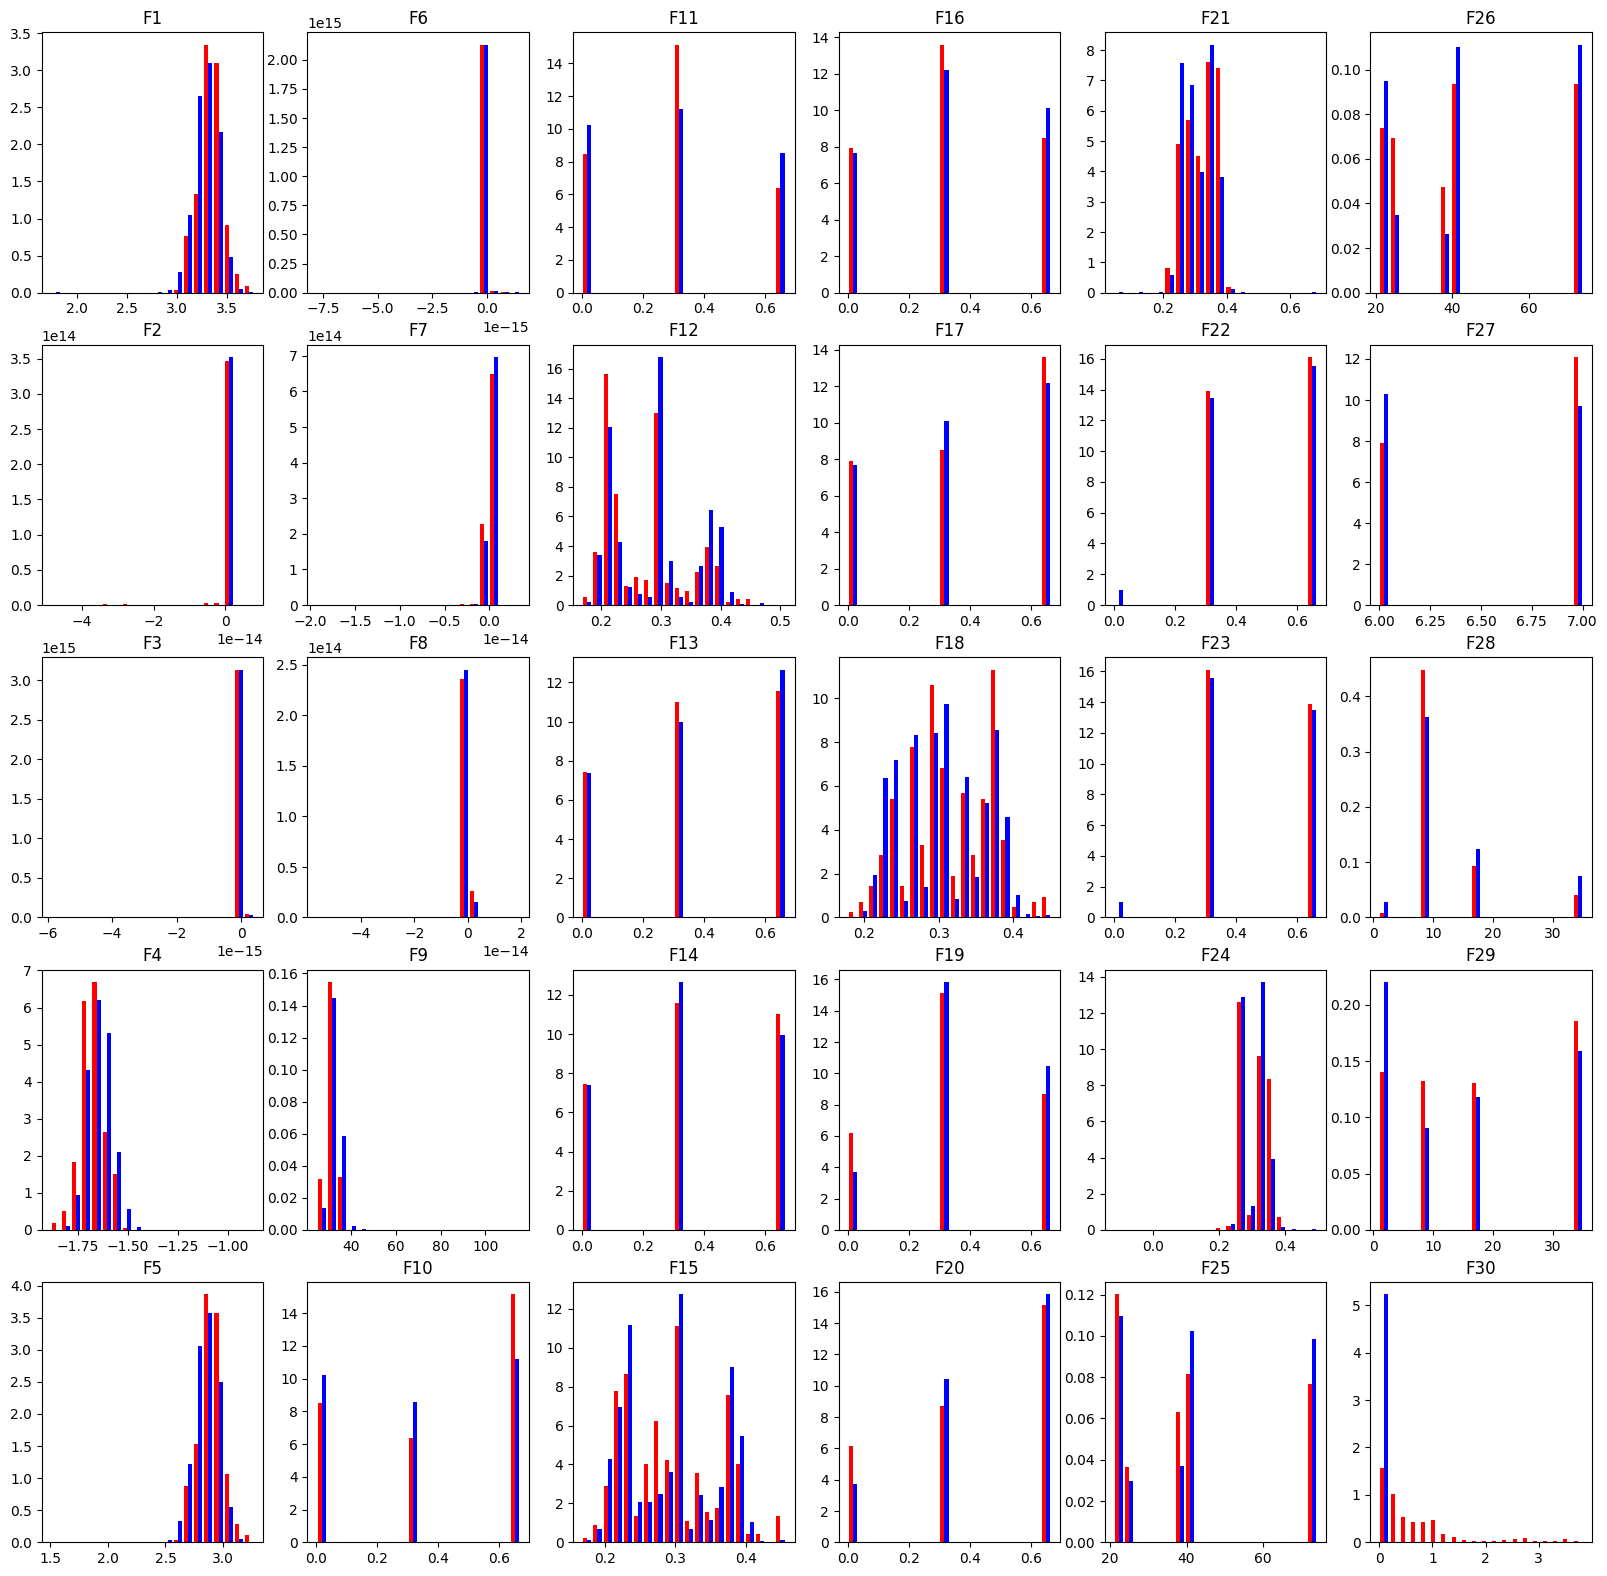

In [23]:
fig, axs = plt.subplots(5, 6)
plt.rcParams['figure.figsize'] = [25,25]
plt.rcParams['figure.dpi'] = 100
bins=20
i=0
j=0
for ind in range(30):
  x=[positives[:,ind], negatives[:,ind]]
  clr=['r', 'b']
  lbl=['Non-metals', 'Metals']
  axs[i,j].hist(x, bins, density=True, color=clr, label=lbl)
  axs[i, j].set_title("F" + str(ind+1))
  i = (i+1)%5
  if (i%5==0):
    j = (j+1)%6

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [0]:
clf_list = [GaussianNB(), LogisticRegression(max_iter=999999999), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),  SVC(probability=True) ]

Accuracy = 75.97402597402598%


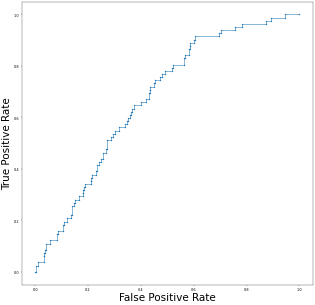

0.6744541883621084
[[445  89]
 [ 59  23]]
Accuracy = 86.2012987012987%


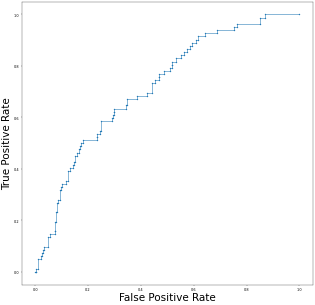

0.7188955878322827
[[530   4]
 [ 81   1]]
Accuracy = 85.3896103896104%


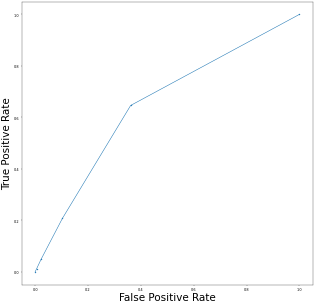

0.646821046862154
[[522  12]
 [ 78   4]]
Accuracy = 83.92857142857143%


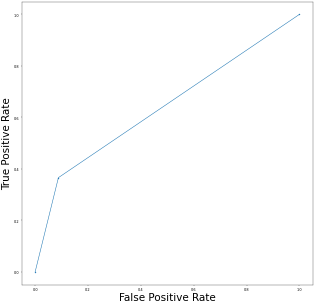

0.6389193386315886
[[487  47]
 [ 52  30]]
Accuracy = 87.98701298701299%


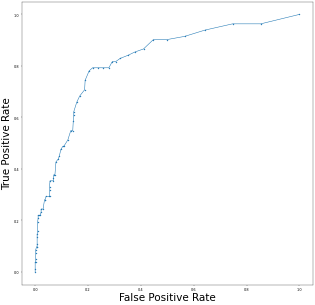

0.8216063761761212
[[524  10]
 [ 64  18]]
Accuracy = 86.68831168831169%


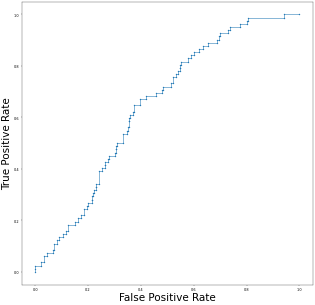

0.648693706038184
[[534   0]
 [ 82   0]]


In [38]:
plt.rcParams['figure.figsize'] = [15,15]
plt.rcParams['figure.dpi'] = 25
for clf in clf_list:
  clf.fit(train, y_train)
  y_pred = clf.predict(test)
  print("Accuracy = " + str(100*accuracy_score(y_test, y_pred)) + "%")
  proba = clf.predict_proba(test)
  proba = proba[:,1]
  lr_fpr, lr_tpr, _ = roc_curve(y_test, proba)
  plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  plt.xlabel('False Positive Rate', size = 30)
  plt.ylabel('True Positive Rate', size = 30)
  plt.show()
  print(roc_auc_score(y_test, proba))
  print(confusion_matrix(y_test, y_pred))